In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, sum
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, DateType

spark = SparkSession.builder.appName("CovidEthnicity").getOrCreate()

In [22]:
df = spark.read.json("hdfs://namenode:8020/user/hadoop/Covid_Ethnicity.JSON", multiLine = True)

In [23]:
df.printSchema()

root
 |-- data: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- meta: struct (nullable = true)
 |    |-- view: struct (nullable = true)
 |    |    |-- approvals: array (nullable = true)
 |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |-- reviewedAt: long (nullable = true)
 |    |    |    |    |-- reviewedAutomatically: boolean (nullable = true)
 |    |    |    |    |-- state: string (nullable = true)
 |    |    |    |    |-- submissionDetails: struct (nullable = true)
 |    |    |    |    |    |-- permissionType: string (nullable = true)
 |    |    |    |    |-- submissionId: long (nullable = true)
 |    |    |    |    |-- submissionObject: string (nullable = true)
 |    |    |    |    |-- submissionOutcome: string (nullable = true)
 |    |    |    |    |-- submissionOutcomeApplication: struct (nullable = true)
 |    |    |    |    |    |-- endedAt: long (nullable = true)
 | 

In [24]:
filas = df.select("data").collect()[0][0]

In [25]:
schema = StructType([
    StructField("id", StringType(), True),
    StructField("uuid", StringType(), True),
    StructField("pos", StringType(), True),
    StructField("ts1", StringType(), True),
    StructField("m1", StringType(), True),
    StructField("ts2", StringType(), True),
    StructField("m2", StringType(), True),
    StructField("m3", StringType(), True),
    StructField("fecha", StringType(), True),
    StructField("grupo", StringType(), True),
    StructField("poblacion", StringType(), True),
    StructField("casos", StringType(), True),
    StructField("tasa_cruda_casos", StringType(), True),
    StructField("tasa_ajustada_casos", StringType(), True),
    StructField("muertes", StringType(), True),
    StructField("tasa_cruda_muertes", StringType(), True),
    StructField("tasa_ajustada_muertes", StringType(), True)
])

In [27]:
df_data = spark.createDataFrame(filas, schema=schema)

df_data = df_data.withColumn("muertes", col("muertes").cast("double"))
df_data = df_data.withColumn("grupo", col("grupo"))

In [28]:
muertes_df = df_data.groupBy("grupo").agg(sum("muertes").alias("muertes_totales"))

In [29]:
muertes_pd = muertes_df.toPandas().sort_values("muertes_totales", ascending=False)

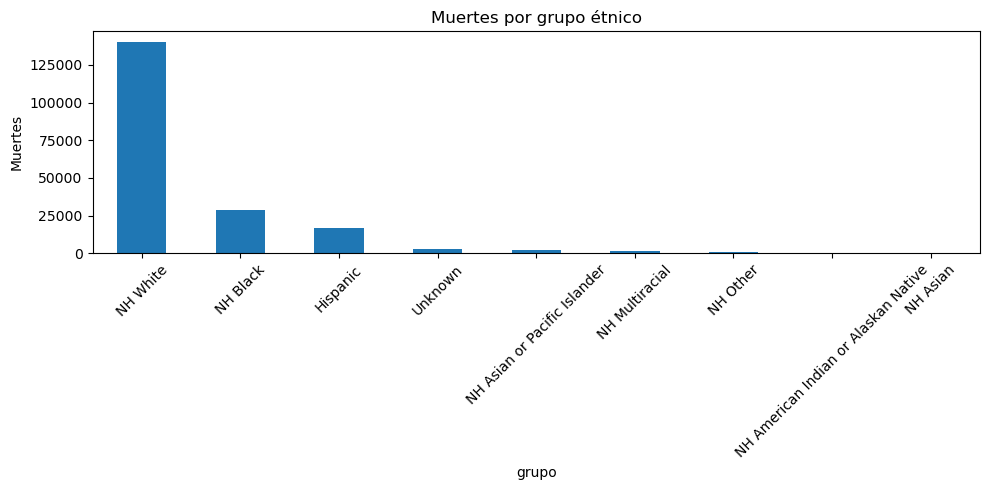

In [30]:
muertes_pd.plot(x="grupo", y="muertes_totales", kind="bar", legend=False, figsize=(10,5), title="Muertes por grupo étnico")
plt.ylabel("Muertes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
"""El gráfico muestra que el grupo con más muertes por COVID-19 fue el de personas blancas no hispanas (NH White). 
Esto puede deberse a que son una gran parte de la población y también porque 
muchas personas en este grupo son mayores, lo que los hace más vulnerables.
Después siguen los afroamericanos no hispanos (NH Black) y los hispanos, 
quienes muchas veces tienen más riesgo por trabajar en empleos esenciales, 
vivir en casas con más personas y tener menos acceso a servicios médicos. 
Otros grupos tienen menos muertes, aunque también podrían ser más pequeños o tener datos incompletos"""